# Project_Notes_006

## New York City Airbnb
In this project, a data with 102599 rows and 26 columns will be used to predict New York City Airbnb apartment prices. DecisionTreeRegressor and XGB will be applied and the algorithm with the lowest RMSE tuned so that the best hyperparameters are selected for the final model.

In [1]:
# Surpress Warnings.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import required modules.
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Define path.
path = './data/Project_Notes_006_NYC_Airbnb.parquet'

In [3]:
# Import the dataset.
airbnb = pd.read_parquet(path)

In [4]:
# Print the shape and head of the dataframe.
print(f'Shape of dataset: {airbnb.shape}\n')
airbnb.head()

Shape of dataset: (102599, 26)



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,None
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,None
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,None,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,None,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",None
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,None,None
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",None


In [5]:
# Check info of dataframe.
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
# List all features.
airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [7]:
# Define required columns and new dataframe.
cols = ['host_identity_verified', 'neighbourhood group', 
        'neighbourhood', 'instant_bookable', 'cancellation_policy', 
        'room type', 'Construction year', 'service fee', 'price']

df = airbnb[cols]

In [8]:
# Print the shape and head of the new dataframe.
print(f'Shape of dataframe: {df.shape}\n')
airbnb.head()

Shape of dataframe: (102599, 9)



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,None
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,None
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,None,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,None,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",None
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,None,None
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",None


In [9]:
# Replace spaces in column names with underscore.
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['host_identity_verified', 'neighbourhood_group', 'neighbourhood',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'service_fee', 'price'],
      dtype='object')

In [10]:
# Check for missing values.
df.isnull().sum()

host_identity_verified    289
neighbourhood_group        29
neighbourhood              16
instant_bookable          105
cancellation_policy        76
room_type                   0
construction_year         214
service_fee               273
price                     247
dtype: int64

In [11]:
# Remove data with null values.
df = df.dropna()
df.isnull().sum()

host_identity_verified    0
neighbourhood_group       0
neighbourhood             0
instant_bookable          0
cancellation_policy       0
room_type                 0
construction_year         0
service_fee               0
price                     0
dtype: int64

In [12]:
# Check data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101528 entries, 0 to 102598
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   host_identity_verified  101528 non-null  object 
 1   neighbourhood_group     101528 non-null  object 
 2   neighbourhood           101528 non-null  object 
 3   instant_bookable        101528 non-null  object 
 4   cancellation_policy     101528 non-null  object 
 5   room_type               101528 non-null  object 
 6   construction_year       101528 non-null  float64
 7   service_fee             101528 non-null  object 
 8   price                   101528 non-null  object 
dtypes: float64(1), object(8)
memory usage: 7.7+ MB


In [13]:
# Remove ',' and '$' signs from price and service_fee columns.
df['price'] = df.price.str.replace(',', '')
df['price'] = df.price.str.replace('$', '')
df['service_fee'] = df.service_fee.str.replace(',', '')
df['service_fee'] = df.service_fee.str.replace('$', '')
df.head()

,host_identity_verified,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,service_fee,price
0,unconfirmed,Brooklyn,Kensington,False,strict,Private room,2020.0,193,966
1,verified,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,28,142
3,unconfirmed,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,74,368
4,verified,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,41,204
5,verified,Manhattan,Murray Hill,True,flexible,Entire home/apt,2013.0,115,577


In [14]:
# Change construction_year, price and service_fee to int
df['construction_year'] = df.construction_year.astype('int')
df['price'] = df.price.astype('int')
df['service_fee'] = df.service_fee.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101528 entries, 0 to 102598
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   host_identity_verified  101528 non-null  object
 1   neighbourhood_group     101528 non-null  object
 2   neighbourhood           101528 non-null  object
 3   instant_bookable        101528 non-null  object
 4   cancellation_policy     101528 non-null  object
 5   room_type               101528 non-null  object
 6   construction_year       101528 non-null  int32 
 7   service_fee             101528 non-null  int32 
 8   price                   101528 non-null  int32 
dtypes: int32(3), object(6)
memory usage: 6.6+ MB


In [15]:
# Check for dimentionality
object = df.select_dtypes(include='object')

for col in object.columns:
    print(object[col].value_counts())
    print()

host_identity_verified
unconfirmed    50799
verified       50729
Name: count, dtype: int64

neighbourhood_group
Manhattan        43353
Brooklyn         41391
Queens           13153
Bronx             2687
Staten Island      943
brookln              1
Name: count, dtype: int64

neighbourhood
Bedford-Stuyvesant        7850
Williamsburg              7688
Harlem                    5401
Bushwick                  4935
Hell's Kitchen            3936
                          ... 
Woodrow                      3
Rossville                    3
Glen Oaks                    2
Fort Wadsworth               2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

instant_bookable
False    50987
True     50541
Name: count, dtype: int64

cancellation_policy
moderate    34016
strict      33804
flexible    33708
Name: count, dtype: int64

room_type
Entire home/apt    53138
Private room       46068
Shared room         2208
Hotel room           114
Name: count, dtype: int64



In [16]:
# Convert 'brookln' in neighbourhood_group to 'Brooklyn'.
df.neighbourhood_group.replace('brookln', 'Brooklyn', inplace=True)

In [17]:
# Check dimentionality of neighbourhood_group.
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        43353
Brooklyn         41392
Queens           13153
Bronx             2687
Staten Island      943
Name: count, dtype: int64

In [18]:
# Split dataset to train, test and validation sets.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Reset index.
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)

# Extract y_train and y_val.
y_train = df_train.price.values
y_val = df_val.price.values

# Remove 'price' column from df_train and df_val.
del df_train['price']
del df_val['price']

In [19]:
# Convert df_train and df_val to dictionaries.
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

# Implement dictvectorizer.
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [20]:
# Train a decision tree regressor model.
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
# Calculate the RMSE of dtr.
pred_val_dtr = dtr.predict(X_val)
RMSE_val_dtr = np.sqrt(mean_squared_error(y_val, pred_val_dtr))
print('RMSE_val_dtr:', RMSE_val_dtr)

RMSE_val_dtr: 1.7764535704119997


In [22]:
# Train an XGB model.
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [23]:
# Create a function for the xgb parameters.
def set_xgb_params(eta_e, max_d, min_c):
    xgb_params = {
                  'eta': eta_e,
                  'max_depth': max_d,
                  'min_child_weight': min_c,
    
                  'objective': 'reg:squarederror',
                  'nthread': 8,
    
                  'seed': 1,
                  'verbosity': 1
                  }
    return xgb_params

In [24]:
# Run the model.
xgb_params = set_xgb_params(0.3, 6, 1)
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [25]:
# Calculate the RMSE of xgb.
pred_val_xgb = model.predict(dval)
RMSE_val_xgb = np.sqrt(mean_squared_error(y_val, pred_val_xgb))
print('RMSE_val_xgb:', RMSE_val_xgb)

RMSE_val_xgb: 1.4096763230118803


XGB is the better model

In [26]:
%%capture output

xgb_params = set_xgb_params(0.3, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [27]:
# Show the captured output.
output.stdout

'[0]\ttrain-rmse:232.47818\teval-rmse:232.55160\n[5]\ttrain-rmse:39.20374\teval-rmse:39.23661\n[10]\ttrain-rmse:6.79401\teval-rmse:6.81580\n[15]\ttrain-rmse:1.85769\teval-rmse:1.87262\n[20]\ttrain-rmse:1.45150\teval-rmse:1.46435\n[25]\ttrain-rmse:1.41837\teval-rmse:1.43332\n[30]\ttrain-rmse:1.40969\teval-rmse:1.42777\n[35]\ttrain-rmse:1.40434\teval-rmse:1.42524\n[40]\ttrain-rmse:1.40087\teval-rmse:1.42458\n[45]\ttrain-rmse:1.39746\teval-rmse:1.42441\n[50]\ttrain-rmse:1.39409\teval-rmse:1.42292\n[55]\ttrain-rmse:1.39151\teval-rmse:1.42251\n[60]\ttrain-rmse:1.38654\teval-rmse:1.42145\n[65]\ttrain-rmse:1.38353\teval-rmse:1.42080\n[70]\ttrain-rmse:1.37948\teval-rmse:1.41931\n[75]\ttrain-rmse:1.37668\teval-rmse:1.41929\n[80]\ttrain-rmse:1.37355\teval-rmse:1.41840\n[85]\ttrain-rmse:1.37101\teval-rmse:1.41844\n[90]\ttrain-rmse:1.36894\teval-rmse:1.41709\n[95]\ttrain-rmse:1.36635\teval-rmse:1.41629\n[100]\ttrain-rmse:1.36283\teval-rmse:1.41564\n[105]\ttrain-rmse:1.35780\teval-rmse:1.41490\n[11

In [28]:
# print the output.
print(output.stdout)

[0]	train-rmse:232.47818	eval-rmse:232.55160
[5]	train-rmse:39.20374	eval-rmse:39.23661
[10]	train-rmse:6.79401	eval-rmse:6.81580
[15]	train-rmse:1.85769	eval-rmse:1.87262
[20]	train-rmse:1.45150	eval-rmse:1.46435
[25]	train-rmse:1.41837	eval-rmse:1.43332
[30]	train-rmse:1.40969	eval-rmse:1.42777
[35]	train-rmse:1.40434	eval-rmse:1.42524
[40]	train-rmse:1.40087	eval-rmse:1.42458
[45]	train-rmse:1.39746	eval-rmse:1.42441
[50]	train-rmse:1.39409	eval-rmse:1.42292
[55]	train-rmse:1.39151	eval-rmse:1.42251
[60]	train-rmse:1.38654	eval-rmse:1.42145
[65]	train-rmse:1.38353	eval-rmse:1.42080
[70]	train-rmse:1.37948	eval-rmse:1.41931
[75]	train-rmse:1.37668	eval-rmse:1.41929
[80]	train-rmse:1.37355	eval-rmse:1.41840
[85]	train-rmse:1.37101	eval-rmse:1.41844
[90]	train-rmse:1.36894	eval-rmse:1.41709
[95]	train-rmse:1.36635	eval-rmse:1.41629
[100]	train-rmse:1.36283	eval-rmse:1.41564
[105]	train-rmse:1.35780	eval-rmse:1.41490
[110]	train-rmse:1.35608	eval-rmse:1.41470
[115]	train-rmse:1.35411	ev

In [29]:
# Function to convert output to dataframe
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

        columns = ['num_iter', 'train_rmse', 'val_rmse']
        df_results = pd.DataFrame(results, columns=columns)

    return df_results

In [30]:
# Convert the output
df_score = parse_xgb_output(output)
df_score

,num_iter,train_rmse,val_rmse
0,0,232.47818,232.55160
1,5,39.20374,39.23661
2,10,6.79401,6.81580
3,15,1.85769,1.87262
4,20,1.45150,1.46435
5,25,1.41837,1.43332
6,30,1.40969,1.42777
7,35,1.40434,1.42524
8,40,1.40087,1.42458
9,45,1.39746,1.42441


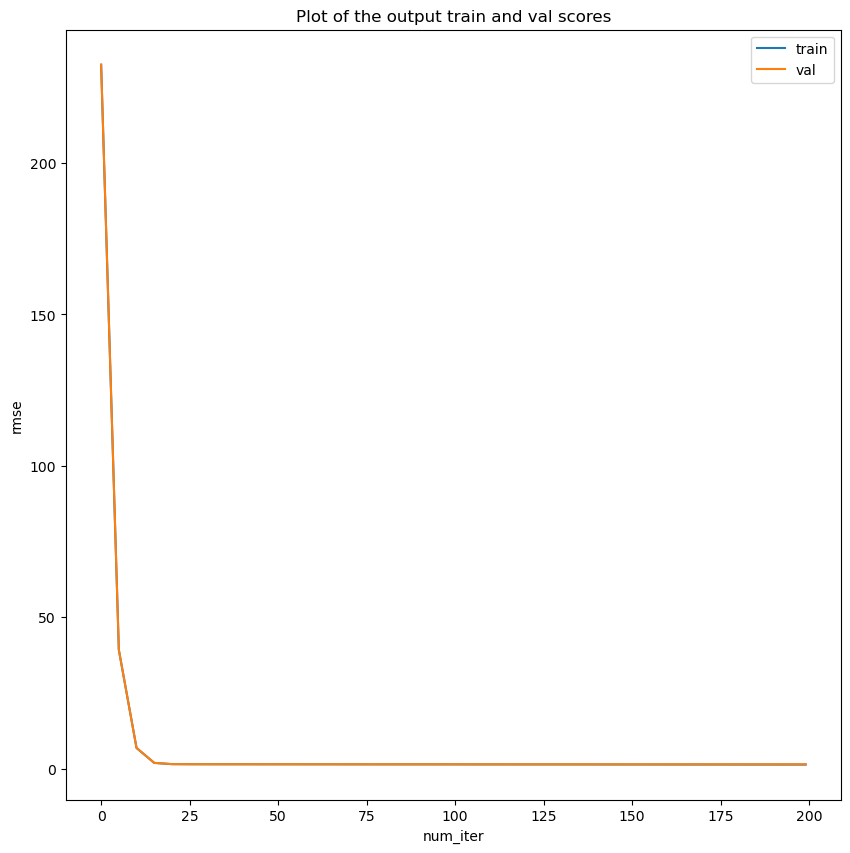

In [31]:
# Plot the output train and val scores.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of the output train and val scores')
plt.legend();

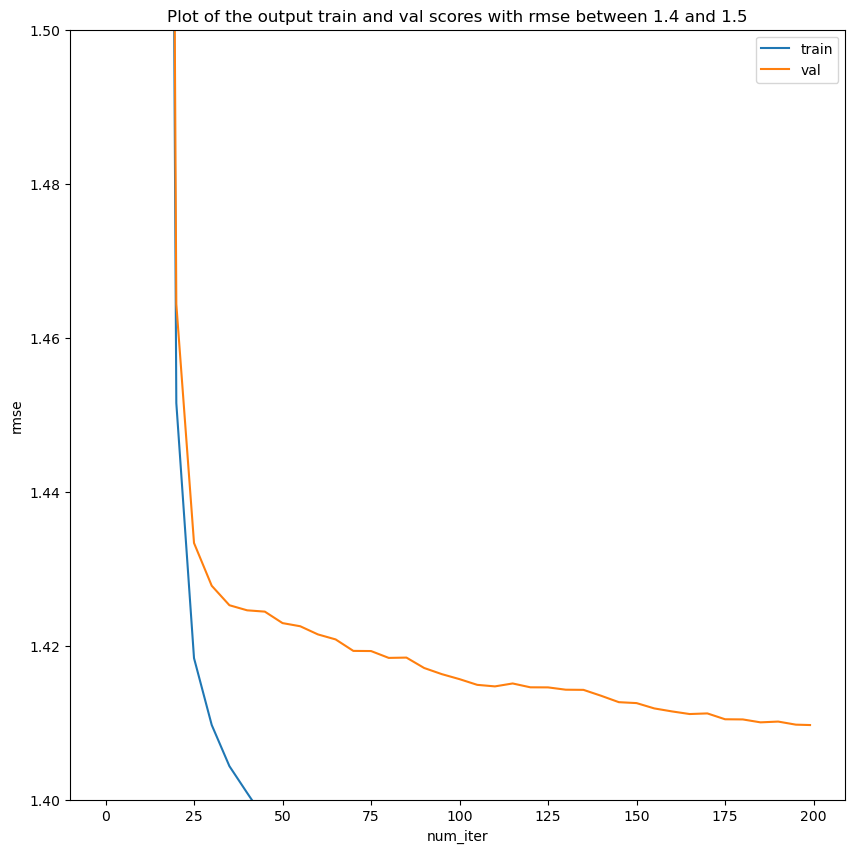

In [32]:
# Plot the output train and val scores with rmse between 1.4 and 1.5.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.ylim(1.4, 1.5)
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of the output train and val scores with rmse between 1.4 and 1.5')
plt.legend();

Create output for eta = 0.1

In [33]:
%%capture output

xgb_params = set_xgb_params(0.1, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [34]:
eta_0_1 = parse_xgb_output(output)['val_rmse']

Create output for eta = 0.2

In [35]:
%%capture output

xgb_params = set_xgb_params(0.2, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [36]:
eta_0_2 = parse_xgb_output(output)['val_rmse']

Create output for eta = 0.3

In [37]:
%%capture output

xgb_params = set_xgb_params(0.3, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [38]:
eta_0_3 = parse_xgb_output(output)['val_rmse']

Create output for eta = 0.5

In [39]:
%%capture output

xgb_params = set_xgb_params(0.5, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [40]:
eta_0_5 = parse_xgb_output(output)['val_rmse']

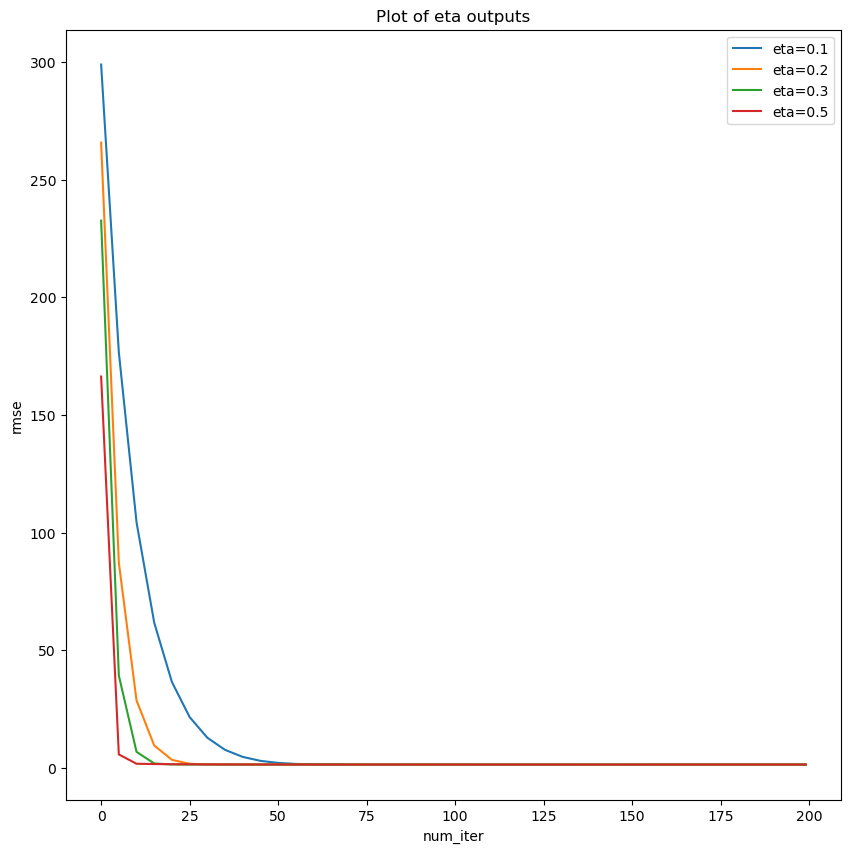

In [41]:
# Plot the eta outputs.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, eta_0_1, label='eta=0.1')
plt.plot(df_score.num_iter, eta_0_2, label='eta=0.2')
plt.plot(df_score.num_iter, eta_0_3, label='eta=0.3')
plt.plot(df_score.num_iter, eta_0_5, label='eta=0.5')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of eta outputs')
plt.legend();

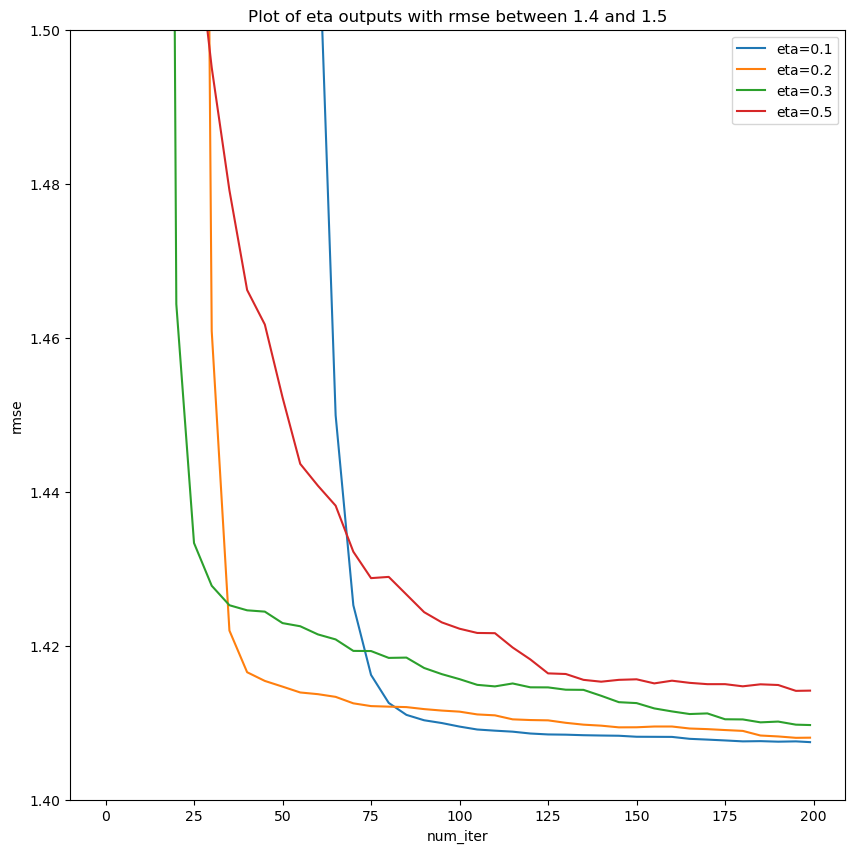

In [42]:
# Plot the eta outputs with rmse between 1.4 and 1.5.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, eta_0_1, label='eta=0.1')
plt.plot(df_score.num_iter, eta_0_2, label='eta=0.2')
plt.plot(df_score.num_iter, eta_0_3, label='eta=0.3')
plt.plot(df_score.num_iter, eta_0_5, label='eta=0.5')
plt.ylim(1.4, 1.5)
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of eta outputs with rmse between 1.4 and 1.5')
plt.legend();

The best eta is 0.1

Create output for max_depth = 6

In [43]:
%%capture output

xgb_params = set_xgb_params(0.1, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [44]:
max_6 = parse_xgb_output(output)['val_rmse']

Create output for max_depth = 10

In [45]:
%%capture output

xgb_params = set_xgb_params(0.1, 10, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [46]:
max_10 = parse_xgb_output(output)['val_rmse']

Create output for max_depth = 20

In [47]:
%%capture output

xgb_params = set_xgb_params(0.1, 20, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [48]:
max_20 = parse_xgb_output(output)['val_rmse']

Create output for max_depth = 30

In [49]:
%%capture output

xgb_params = set_xgb_params(0.1, 30, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [50]:
max_30 = parse_xgb_output(output)['val_rmse']

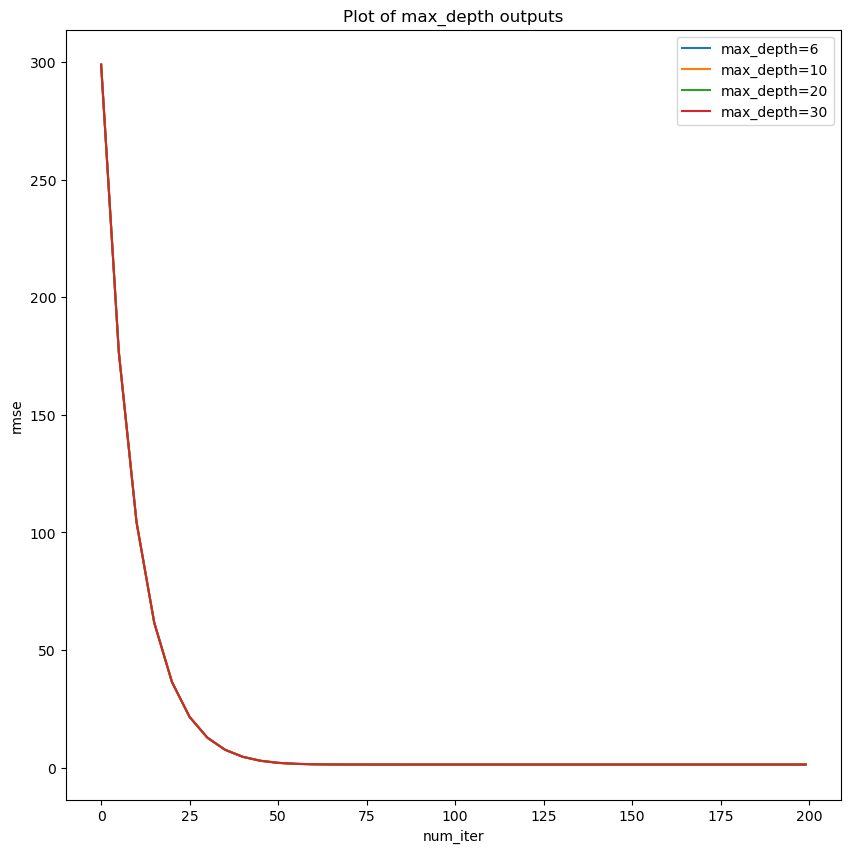

In [51]:
# Plot the max_depth outputs.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, max_6, label='max_depth=6')
plt.plot(df_score.num_iter, max_10, label='max_depth=10')
plt.plot(df_score.num_iter, max_20, label='max_depth=20')
plt.plot(df_score.num_iter, max_30, label='max_depth=30')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of max_depth outputs')
plt.legend();

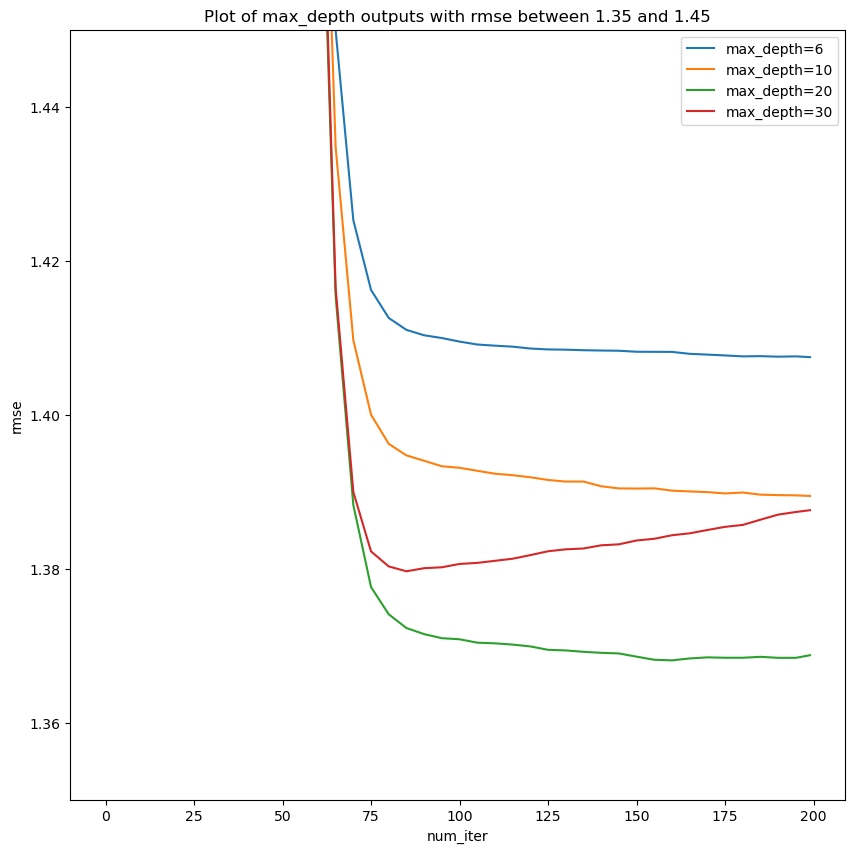

In [52]:
# Plot the max_depth outputs with rmse between 1.35 and 1.45.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, max_6, label='max_depth=6')
plt.plot(df_score.num_iter, max_10, label='max_depth=10')
plt.plot(df_score.num_iter, max_20, label='max_depth=20')
plt.plot(df_score.num_iter, max_30, label='max_depth=30')
plt.ylim(1.35, 1.45)
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of max_depth outputs with rmse between 1.35 and 1.45')
plt.legend();

The best max_depth = 20

Create output for min_child_weight = 1

In [53]:
%%capture output

xgb_params = set_xgb_params(0.1, 20, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [54]:
min_1 = parse_xgb_output(output)['val_rmse']

Create output for min_child_weight = 3

In [55]:
%%capture output

xgb_params = set_xgb_params(0.1, 20, 3)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [56]:
min_3 = parse_xgb_output(output)['val_rmse']

Create output for min_child_weight = 10

In [57]:
%%capture output

xgb_params = set_xgb_params(0.1, 20, 10)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [58]:
min_10 = parse_xgb_output(output)['val_rmse']

Create output for min_child_weight = 20

In [59]:
%%capture output

xgb_params = set_xgb_params(0.1, 20, 20)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [60]:
min_20 = parse_xgb_output(output)['val_rmse']

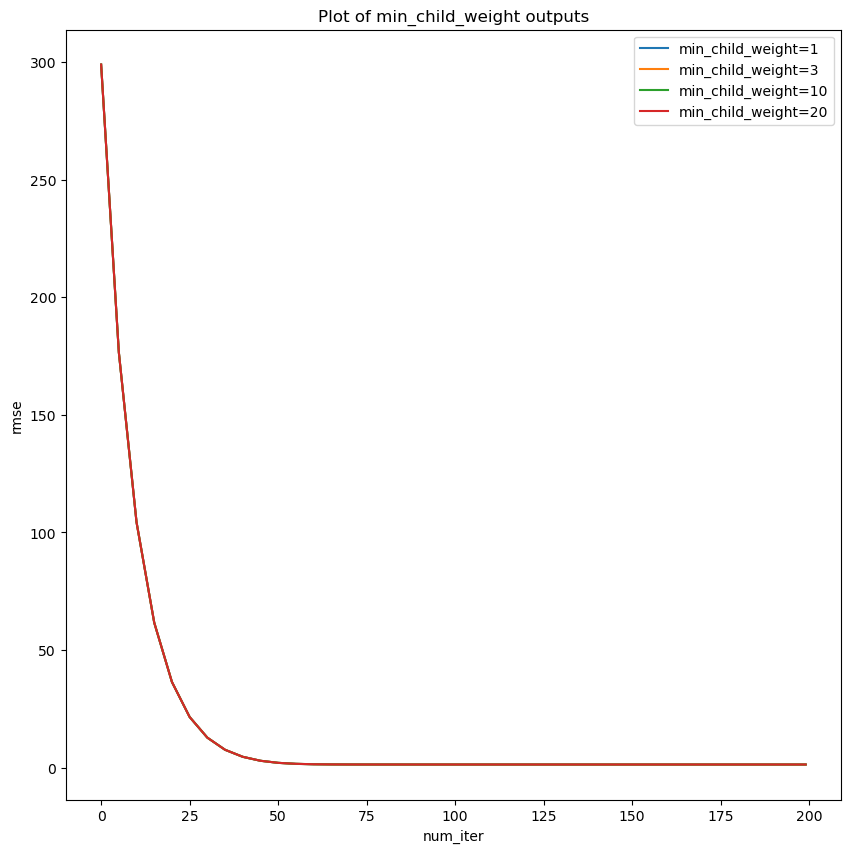

In [61]:
# Plot the max_depth outputs.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, min_1, label='min_child_weight=1')
plt.plot(df_score.num_iter, min_3, label='min_child_weight=3')
plt.plot(df_score.num_iter, min_10, label='min_child_weight=10')
plt.plot(df_score.num_iter, min_20, label='min_child_weight=20')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of min_child_weight outputs')
plt.legend();

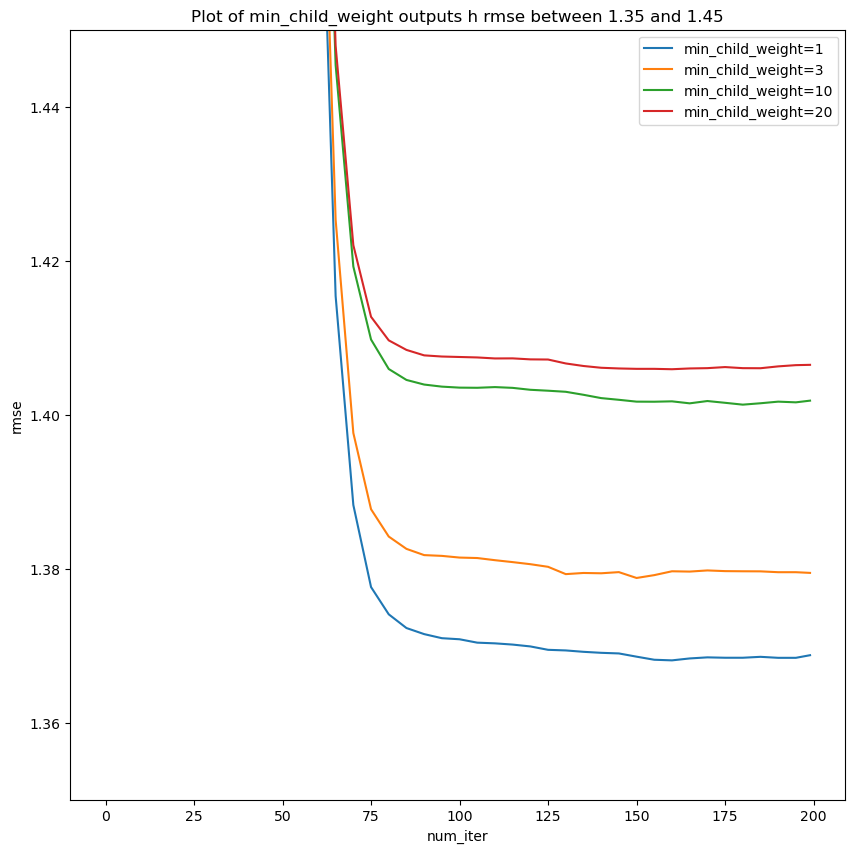

In [62]:
# Plot the max_depth outputs h rmse between 1.35 and 1.45.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, min_1, label='min_child_weight=1')
plt.plot(df_score.num_iter, min_3, label='min_child_weight=3')
plt.plot(df_score.num_iter, min_10, label='min_child_weight=10')
plt.plot(df_score.num_iter, min_20, label='min_child_weight=20')
plt.ylim(1.35, 1.45)
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of min_child_weight outputs h rmse between 1.35 and 1.45')
plt.legend();

The best min_child_weight = 1

In [63]:
# Use the best parameter to find the model rmse.

xgb_params = set_xgb_params(0.1, 20, 1)

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [64]:
# Calculate the best RMSE of xgb.
pred_val_xgb = model.predict(dval)
RMSE_val_xgb = np.sqrt(mean_squared_error(y_val, pred_val_xgb))
print('RMSE_val_xgb:', RMSE_val_xgb)

RMSE_val_xgb: 1.368746564348646


In [65]:
# Training with full train.
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train.price.values
y_test = df_test.price.values

del df_full_train['price']
del df_test['price']

full_train_dict = df_full_train.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

X_full_train = dv.fit_transform(full_train_dict)
X_test = dv.transform(test_dict)

features = list(dv.get_feature_names_out())

dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, 
                          feature_names=features)

dtest = xgb.DMatrix(X_test, label=y_test, 
                    feature_names=features)

In [66]:
# Fit the model.
xgb_params = set_xgb_params(0.1, 20, 1)

# Build model.
final_model = xgb.train(xgb_params, dfull_train, num_boost_round=200)

In [67]:
# Calculate the RMSE of xgb with X_test.
pred_test_xgb = final_model.predict(dtest)
RMSE_test_xgb = np.sqrt(mean_squared_error(y_test, pred_test_xgb))
print('RMSE_test_xgb:', RMSE_test_xgb)

RMSE_test_xgb: 1.3204598892191763


In [68]:
# Save the model to disk.
filename = './data/Project_Notes_006_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

In [69]:
# load the model from disk.
pickled_model = pickle.load(open(filename, 'rb'))

In [70]:
# Select data to predict.
raw_data = df.iloc[200, :]
raw_data

host_identity_verified           verified
neighbourhood_group              Brooklyn
neighbourhood                Clinton Hill
instant_bookable                    False
cancellation_policy              flexible
room_type                 Entire home/apt
construction_year                    2006
service_fee                           140
price                                 701
Name: 325, dtype: object

In [71]:
# Create dictionary for prediction.
raw_data = {
            'host_identity_verified': 'verified',
            'neighbourhood_group': 'Brooklyn',
            'neighbourhood': 'Clinton Hill',
            'instant_bookable': 'False',
            'cancellation_policy': 'flexible',
            'room_type': 'Entire home/apt',
            'construction_year': 2006,
            'service_fee': 140
            }

In [72]:
# Function to process raw data
def process_data(data):
    features = list(dv.get_feature_names_out())
    trans = dv.transform(data)
    dmatrix = xgb.DMatrix(trans, label=y_full_train, feature_names=features)
    return dmatrix

In [73]:
# Predict data.
trans_data = process_data(raw_data)
the_prediction = pickled_model.predict(trans_data)
the_prediction[0]

700.77277

In [74]:
# Select another data to predict.
raw_data = df.iloc[4002, :]
raw_data

host_identity_verified        unconfirmed
neighbourhood_group             Manhattan
neighbourhood             Upper West Side
instant_bookable                    False
cancellation_policy              moderate
room_type                 Entire home/apt
construction_year                    2008
service_fee                            53
price                                 267
Name: 4300, dtype: object

In [75]:
# Create dictionary for prediction.
raw_data = {
            'host_identity_verified': 'unconfirmed',
            'neighbourhood_group': 'Manhattan',
            'neighbourhood': 'Upper West Side',
            'instant_bookable': 'False',
            'cancellation_policy': 'moderate',
            'room_type': 'Entire home/apt',
            'construction_year': 2008,
            'service_fee': 53
            }

In [76]:
# Predict data.
trans_data = process_data(raw_data)
the_prediction = pickled_model.predict(trans_data)
the_prediction[0]

265.03186

In [77]:
# Select another data to predict.
raw_data = df.iloc[10202, :]
raw_data

host_identity_verified        unconfirmed
neighbourhood_group                Queens
neighbourhood             Jackson Heights
instant_bookable                     True
cancellation_policy              flexible
room_type                    Private room
construction_year                    2013
service_fee                           219
price                                1096
Name: 10564, dtype: object

In [78]:
# Create dictionary for prediction.
raw_data = {
            'host_identity_verified': 'unconfirmed',
            'neighbourhood_group': 'Queens',
            'neighbourhood': 'Jackson Heights',
            'instant_bookable': 'True',
            'cancellation_policy': 'flexible',
            'room_type': 'Private room',
            'construction_year': 2013,
            'service_fee': 219
            }

In [79]:
# Predict data.
trans_data = process_data(raw_data)
the_prediction = pickled_model.predict(trans_data)
the_prediction[0]

1096.0616